In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Формируем датасеты

In [3]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# EDA


Посмотрим информацию по нашим датасетам

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Отрисуем боксплоты для признаков Square и LifeSquare

<Axes: ylabel='LifeSquare'>

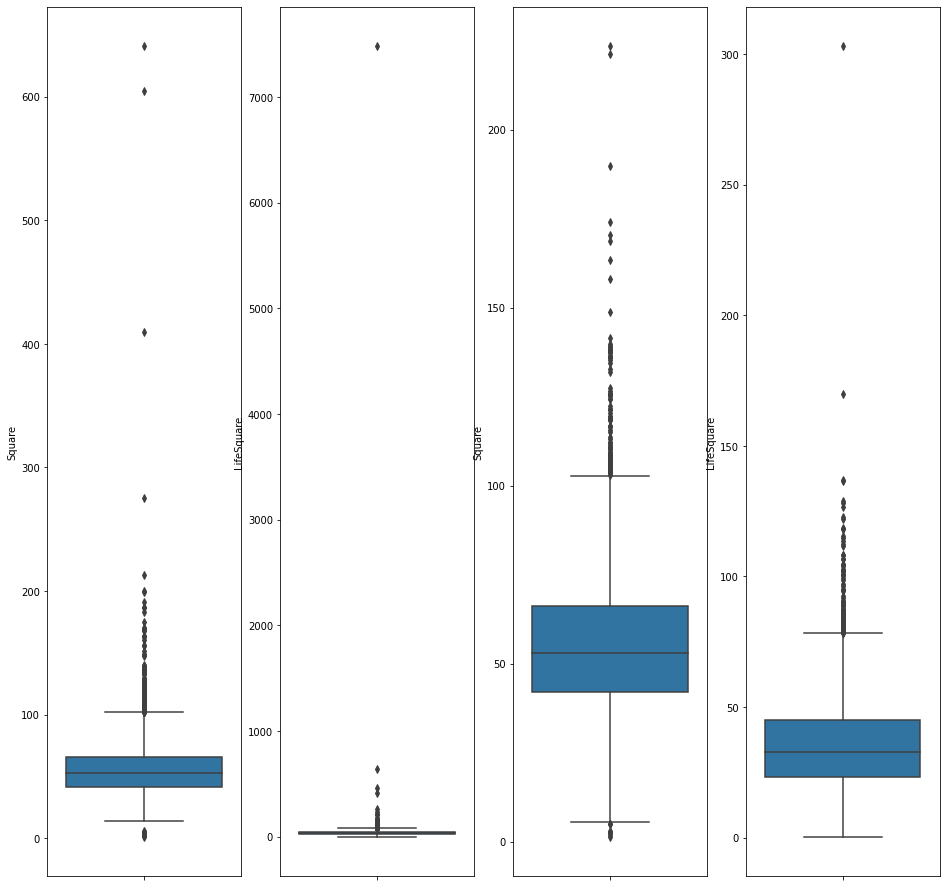

In [6]:
fig = plt.figure(figsize=(16,16))
ax = fig.subplots(1,4)
sns.boxplot(y = df_train['Square'],ax=ax[0])
sns.boxplot(y = df_train['LifeSquare'], ax=ax[1])
sns.boxplot(y = df_test['Square'],ax=ax[2])
sns.boxplot(y = df_test['LifeSquare'], ax=ax[3])

Также посмотрим есть ли у нас жилая площадь, которая больше, чем общая площадь

In [7]:
df_train[(df_train['LifeSquare']>df_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2.0,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3.0,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [8]:
df_test[(df_test['LifeSquare']>df_test['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4951,3711,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,B,B,33,8667,2,NaN,0,6,B
4962,5820,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,B,B,43,8429,3,NaN,3,9,B
4969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


По результатам манипуляций сверху, видим, что есть у нас пропуски данных, а 
также есть значения жилой площади больше, чем общая площадь. Постараемся исправить данные, чтобы модель получилась более точной.
Также у нас есть 3 признака с типом object, однако они являются бинарными по своей природе, поэтому тоже сделаем их бинарными в нашей БД. Изменение типа данных позволит ускорить работу нашей модели при большом объеме данных(тип object обрабатывается медленнее всего))




Присваиваем бинарные значения признакам

In [9]:
df_train['Ecology_2'].replace({'B':1, 'A':0}, inplace=True)
df_train['Ecology_3'].replace({'B':1, 'A':0}, inplace=True)
df_train['Shops_2'].replace({'B':1, 'A':0}, inplace=True)
df_test['Ecology_2'].replace({'B':1, 'A':0}, inplace=True)
df_test['Ecology_3'].replace({'B':1, 'A':0}, inplace=True)
df_test['Shops_2'].replace({'B':1, 'A':0}, inplace=True)

Удаляем объекты, где жилая площадь больше, чем общая

In [10]:
biggest_life_square_train = []

for indx in df_train.index:
  if df_train['LifeSquare'].iloc[indx] > df_train['Square'].iloc[indx]:
    biggest_life_square_train.append(indx)

df_train.drop(biggest_life_square_train, axis=0,inplace=True)

In [11]:
biggest_life_square_test = []

for indx in df_test.index:
  if df_test['LifeSquare'].iloc[indx] > df_test['Square'].iloc[indx]:
    biggest_life_square_test.append(indx)

df_test.drop(biggest_life_square_test, axis=0,inplace=True)

Заменяем пропуски в признаках LifeSquare и Healthcare_1

In [12]:
df_train['LifeSquare'].fillna((df_train['Square']-df_train['KitchenSquare'])*0.7, inplace=True)
df_test['LifeSquare'].fillna((df_test['Square']-df_test['KitchenSquare'])*0.7, inplace=True)

In [13]:
df_train.insert(19,'Healthcare_1_Nan',0)
df_test['Healthcare_1_Nan'] = 0

df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1_Nan'] = 1
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1_Nan'] = 1


df_train['Healthcare_1'].fillna(0, inplace=True)
df_test['Healthcare_1'].fillna(0, inplace=True)

Смотрим что получилось и отрисовываем матрицу корреляции и боксплоты заново

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9518 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                9518 non-null   int64  
 1   DistrictId        9518 non-null   int64  
 2   Rooms             9518 non-null   float64
 3   Square            9518 non-null   float64
 4   LifeSquare        9518 non-null   float64
 5   KitchenSquare     9518 non-null   float64
 6   Floor             9518 non-null   int64  
 7   HouseFloor        9518 non-null   float64
 8   HouseYear         9518 non-null   int64  
 9   Ecology_1         9518 non-null   float64
 10  Ecology_2         9518 non-null   int64  
 11  Ecology_3         9518 non-null   int64  
 12  Social_1          9518 non-null   int64  
 13  Social_2          9518 non-null   int64  
 14  Social_3          9518 non-null   int64  
 15  Healthcare_1      9518 non-null   float64
 16  Helthcare_2       9518 non-null   int64  


<Axes: ylabel='LifeSquare'>

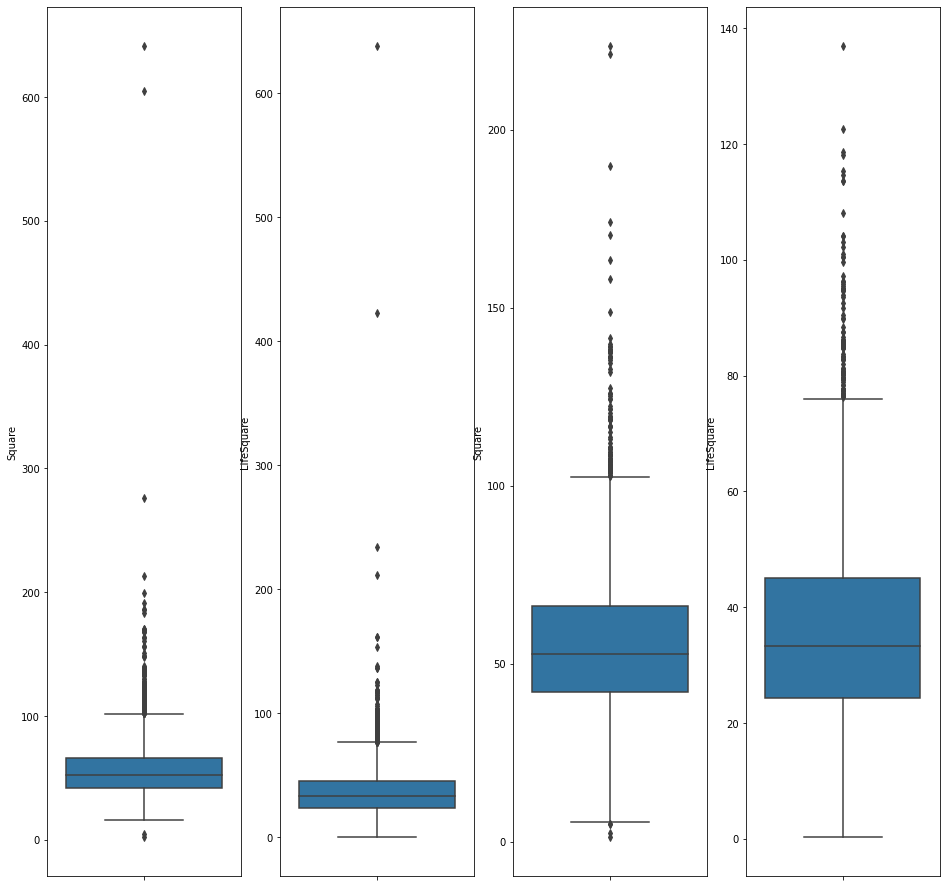

In [15]:
fig = plt.figure(figsize=(16,16))
ax = fig.subplots(1,4)
sns.boxplot(y = df_train['Square'],ax=ax[0])
sns.boxplot(y = df_train['LifeSquare'], ax=ax[1])
sns.boxplot(y = df_test['Square'],ax=ax[2])
sns.boxplot(y = df_test['LifeSquare'], ax=ax[3])

<Axes: >

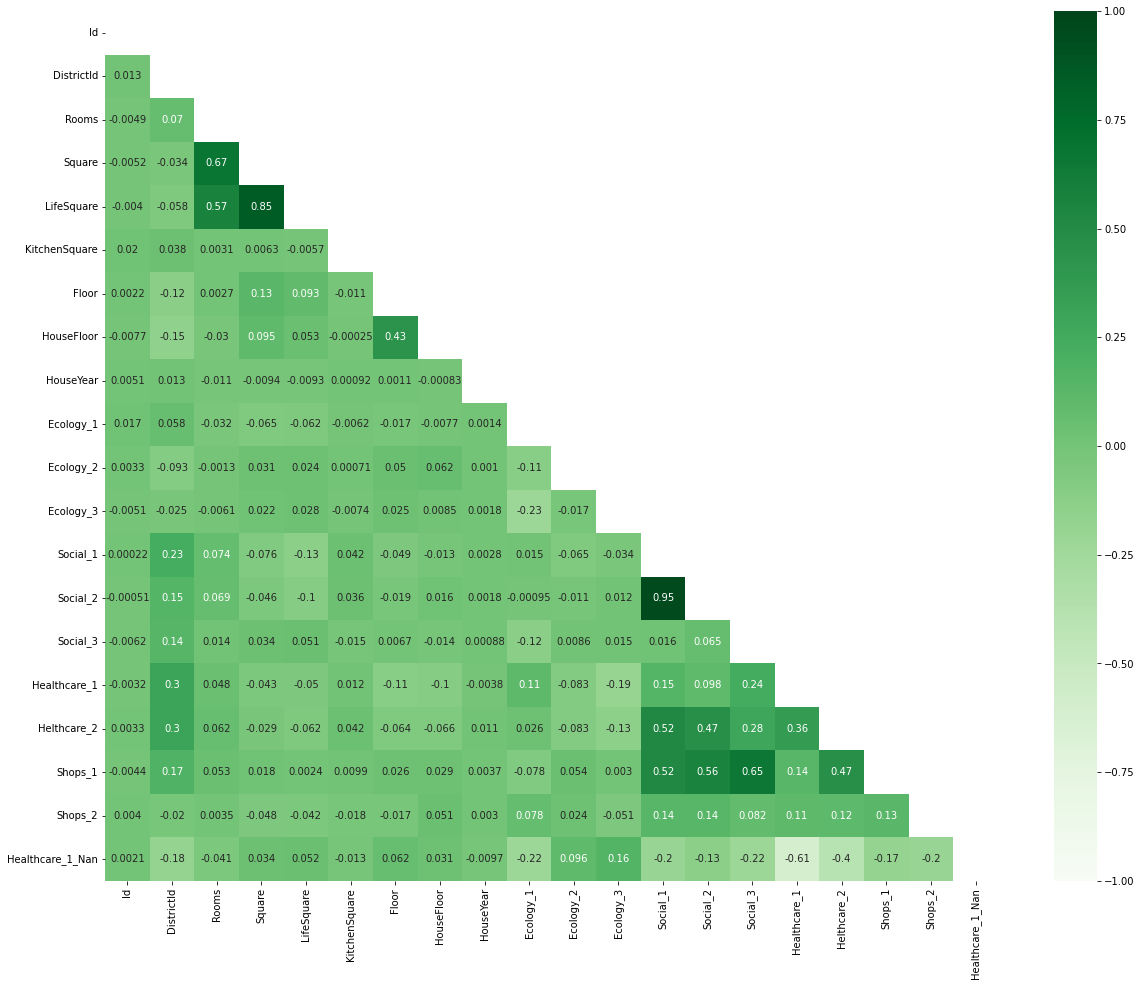

In [16]:
matrix = np.triu(df_train.iloc[:,:-1].corr())
plt.figure(figsize=(20,16))
sns.heatmap(df_train.iloc[:,:-1].corr(), vmin=-1, vmax=1, cmap='Greens', annot=True, mask=matrix)

На выходе получили более менее данные, с которыми модель будет работать получше

# Модели регрессии

Импорт необходимых инструментов

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, HuberRegressor, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
pd.set_option('display.float_format', lambda x:'%0.3f'%x)

Прописываем функции для масштабирования данных

In [19]:
def scaler(train,test, method=None):
  if method=='std':
    scaler = StandardScaler()
    scaled_data_train = scaler.fit_transform(train)
    scaled_data_test = scaler.transform(test)
    df_scaled_data_train = pd.DataFrame(scaled_data_train, columns=train.columns)
    df_scaled_data_test = pd.DataFrame(scaled_data_test, columns=test.columns)
  if method=='minmax':
    scaler = MinMaxScaler()
    scaled_data_train = scaler.fit_transform(train)
    scaled_data_test = scaler.transform(test)
    df_scaled_data_train = pd.DataFrame(scaled_data_train, columns=train.columns)
    df_scaled_data_test = pd.DataFrame(scaled_data_test, columns=test.columns)
  if method=='robust':
    scaler = RobustScaler()
    scaled_data_train = scaler.fit_transform(train)
    scaled_data_test = scaler.transform(test)
    df_scaled_data_train = pd.DataFrame(scaled_data_train, columns=train.columns)
    df_scaled_data_test = pd.DataFrame(scaled_data_test, columns=test.columns)
  return df_scaled_data_train, df_scaled_data_test

Разбиваем тренировочный датасет на обучение и валидацию

In [21]:
X_train = df_train.drop(columns='Price', axis=1)
X_test = df_test
y_train = df_train['Price']

X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=5)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((8566, 20), (952, 20), (8566,), (952,))

Определим коэффициенты Alpha для моделей с регуляризацией

In [22]:
alpha = list(np.logspace(-10, 3, 10))
l1_ratio = list(np.linspace(0, 1, 5))

In [23]:
alpha

[1e-10,
 2.7825594022071257e-09,
 7.742636826811277e-08,
 2.1544346900318822e-06,
 5.994842503189409e-05,
 0.0016681005372000592,
 0.046415888336127725,
 1.2915496650148828,
 35.93813663804626,
 1000.0]

In [24]:
l1_ratio

[0.0, 0.25, 0.5, 0.75, 1.0]

# ElasticNet

StandartScaler

In [25]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='std')

data_EN = {
    'l1_ratio':[],
    'alpha':[],
    'score_train':[],
    'score_valid':[]}

for i in l1_ratio:
  for j in alpha:
      model = ElasticNet(l1_ratio=i,alpha=j, random_state = 4, max_iter=1000)
      model.fit(X_train_scaled, y_train)
      data_EN['l1_ratio'].append(i)
      data_EN['alpha'].append(j)
      data_EN['score_train'].append(model.score(X_train_scaled,y_train))
      data_EN['score_valid'].append(model.score(X_valid_scaled,y_valid))

df_EN = pd.DataFrame(data_EN)
df_EN.sort_values(['score_valid','score_train'],ascending=False)

,l1_ratio,alpha,score_train,score_valid
49,1.000,1000.000,0.503,0.506
26,0.500,0.046,0.505,0.503
16,0.250,0.046,0.505,0.503
36,0.750,0.046,0.506,0.503
6,0.000,0.046,0.504,0.503
48,1.000,35.938,0.506,0.503
5,0.000,0.002,0.506,0.503
15,0.250,0.002,0.506,0.502
25,0.500,0.002,0.506,0.502
35,0.750,0.002,0.506,0.502


MinMaxScaler

In [26]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='minmax')

data_EN = {
    'l1_ratio':[],
    'alpha':[],
    'score_train':[],
    'score_valid':[]}
    
for i in l1_ratio:
  for j in alpha:
      model = ElasticNet(l1_ratio=i,alpha=j, random_state = 4, max_iter=1000)
      model.fit(X_train_scaled, y_train)
      data_EN['l1_ratio'].append(i)
      data_EN['alpha'].append(j)
      data_EN['score_train'].append(model.score(X_train_scaled,y_train))
      data_EN['score_valid'].append(model.score(X_valid_scaled,y_valid))

df_EN = pd.DataFrame(data_EN)
df_EN.sort_values(['score_valid','score_train'],ascending=False)

,l1_ratio,alpha,score_train,score_valid
48,1.000,35.938,0.503,0.504
34,0.750,0.000,0.506,0.503
47,1.000,1.292,0.506,0.503
3,0.000,0.000,0.506,0.502
13,0.250,0.000,0.506,0.502
23,0.500,0.000,0.506,0.502
33,0.750,0.000,0.506,0.502
46,1.000,0.046,0.506,0.502
2,0.000,0.000,0.506,0.502
12,0.250,0.000,0.506,0.502


RobustScaler

In [27]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='robust')

data_EN = {
    'l1_ratio':[],
    'alpha':[],
    'score_train':[],
    'score_valid':[]}
    
for i in l1_ratio:
  for j in alpha:
      model = ElasticNet(l1_ratio=i,alpha=j, random_state = 4, max_iter=1000)
      model.fit(X_train_scaled, y_train)
      data_EN['l1_ratio'].append(i)
      data_EN['alpha'].append(j)
      data_EN['score_train'].append(model.score(X_train_scaled,y_train))
      data_EN['score_valid'].append(model.score(X_valid_scaled,y_valid))

df_EN = pd.DataFrame(data_EN)
df_EN.sort_values(['score_valid','score_train'],ascending=False)

,l1_ratio,alpha,score_train,score_valid
48,1.000,35.938,0.506,0.503
36,0.750,0.046,0.505,0.503
5,0.000,0.002,0.506,0.503
15,0.250,0.002,0.506,0.503
25,0.500,0.002,0.506,0.502
49,1.000,1000.000,0.497,0.502
35,0.750,0.002,0.506,0.502
26,0.500,0.046,0.503,0.502
47,1.000,1.292,0.506,0.502
4,0.000,0.000,0.506,0.502


# HuberRegressor

StandartScaler

In [28]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='std')

data_HR = {
    'alpha':[],
    'score_train':[],
    'score_valid':[]}

for j in alpha:
  model = HuberRegressor(alpha=j,warm_start=True,max_iter=1000)
  model.fit(X_train_scaled, y_train)
  data_HR['alpha'].append(j)
  data_HR['score_train'].append(model.score(X_train_scaled,y_train))
  data_HR['score_valid'].append(model.score(X_valid_scaled,y_valid))
  
df_HR = pd.DataFrame(data_HR)
df_HR.sort_values(['score_valid','score_train'],ascending=False)

,alpha,score_train,score_valid
5,0.002,0.492,0.510
4,0.000,0.491,0.509
3,0.000,0.491,0.509
2,0.000,0.491,0.509
1,0.000,0.491,0.509
0,0.000,0.491,0.509
6,0.046,0.464,0.482
7,1.292,0.101,0.114
8,35.938,-0.026,-0.017
9,1000.000,-0.032,-0.022


MinMaxScaler

In [29]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='minmax')

data_HR = {
    'alpha':[],
    'score_train':[],
    'score_valid':[]}
    
for j in alpha:
    model = HuberRegressor(alpha=j,warm_start=True,max_iter=1000)
    model.fit(X_train_scaled, y_train)
    data_HR['alpha'].append(j)
    data_HR['score_train'].append(model.score(X_train_scaled,y_train))
    data_HR['score_valid'].append(model.score(X_valid_scaled,y_valid))

df_HR = pd.DataFrame(data_HR)
df_HR.sort_values(['score_valid','score_train'],ascending=False)

,alpha,score_train,score_valid
3,0.000,0.492,0.510
2,0.000,0.491,0.509
0,0.000,0.491,0.509
1,0.000,0.491,0.509
4,0.000,0.475,0.485
5,0.002,0.218,0.228
6,0.046,0.023,0.034
7,1.292,-0.029,-0.019
8,35.938,-0.032,-0.023
9,1000.000,-0.032,-0.023


RobustScaler

In [30]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='robust')

data_HR = {
    'alpha':[],
    'score_train':[],
    'score_valid':[]}
    
for j in alpha:
    model = HuberRegressor(alpha=j,warm_start=True,max_iter=1000)
    model.fit(X_train_scaled, y_train)
    data_HR['alpha'].append(j)
    data_HR['score_train'].append(model.score(X_train_scaled,y_train))
    data_HR['score_valid'].append(model.score(X_valid_scaled,y_valid))

df_HR = pd.DataFrame(data_HR)
df_HR.sort_values(['score_valid','score_train'],ascending=False)

,alpha,score_train,score_valid
5,0.002,0.481,0.507
8,35.938,-0.028,-0.019
9,1000.000,-0.032,-0.023
7,1.292,-5.378,-5.540
6,0.046,-5.378,-5.540
0,0.000,-5.378,-5.540
3,0.000,-5.378,-5.540
1,0.000,-5.378,-5.540
2,0.000,-5.378,-5.540
4,0.000,-5.378,-5.540


# LinearRegression

StandartScaler

In [31]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='std')

model = LinearRegression(copy_X=True, n_jobs=-1, positive=True)
model.fit(X_train_scaled, y_train)

print(f'Метрика (R2) на обучении: {model.score(X_train_scaled,y_train)}')
print(f'Метрика (R2) на тесте: {model.score(X_valid_scaled,y_valid)}')

Метрика (R2) на обучении: 0.49383369876676875
Метрика (R2) на тесте: 0.5001750876291056


MinMaxScaler

In [32]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='minmax')

model = LinearRegression(copy_X=True, n_jobs=-1, positive=True)
model.fit(X_train_scaled, y_train)

print(f'Метрика (R2) на обучении: {model.score(X_train_scaled,y_train)}')
print(f'Метрика (R2) на тесте: {model.score(X_valid_scaled,y_valid)}')

Метрика (R2) на обучении: 0.49383369876676886
Метрика (R2) на тесте: 0.5001750876291051


RobustScaler

In [33]:
X_train_scaled, X_valid_scaled = scaler(train=X_train,test=X_valid,method='robust')

model = LinearRegression(copy_X=True, n_jobs=-1, positive=True)
model.fit(X_train_scaled, y_train)

print(f'Метрика (R2) на обучении: {model.score(X_train_scaled,y_train)}')
print(f'Метрика (R2) на тесте: {model.score(X_valid_scaled,y_valid)}')

Метрика (R2) на обучении: 0.49383369876676886
Метрика (R2) на тесте: 0.5001750876291056


# RandomForestRegressor

In [34]:
model_RFR = RandomForestRegressor(max_depth = 20, max_leaf_nodes=800, min_samples_leaf=3, n_estimators=200)
model_RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_leaf_nodes=800, min_samples_leaf=3,
                      n_estimators=200)

In [35]:
print(f'Метрика (R2) на обучении: {model_RFR.score(X_train,y_train)}')
print(f'Метрика (R2) на тесте: {model_RFR.score(X_valid,y_valid)}')

Метрика (R2) на обучении: 0.9068840322094603
Метрика (R2) на тесте: 0.6994282066025368


# Заключение

Изучив результаты моделей, можно сделать вывод, что лучше всего показывает себя модель RandomForestRegressor.
Линейные модели не справляются с воспроизведением сложных зависимостей. Метрики на обучении и тесте низкие.
Применив модели с регуляризацией также нет каких либо удовлетворительных результатов.
Деревья решений больше подходят для сложных зависимостей, так как они имеют меньшее смещение ответов, но имеют высокий разброс. Для того чтобы ликвидировать высокий разброс используется модель RandomForestRegressor.
Хоть и метрика на валидации при использовании RandomForestRegressor тоже не вызывает доверие к модели, но ее стоит учитывать при проектировании на реальных данных.
Также можно рассмотреть более сложные модели из модуля ensemble(дополнительно было испробована модель GradientBoostingRegressor, но метрики там мало отличаются от RandomForestRegressor).
Все параметры были подобраны при помощи GridSearchCV с cv = 5. Из финального кода было исключен процесс подбора в виду долгого процесса подбора(около 3-х часов)